In [1]:
import tensorflow as tf
from tensorflow import keras as k
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2023-07-18 14:55:47.826980: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/count
2023-07-18 14:55:47.827047: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/count
2023-07-18 14:55:47.827058: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/write/api
2023-07-18 14:55:47.827063: E tensorflow/core/lib/monitoring/collection_registry.cc:77] Cannot register 2 metrics with the same name: /tensorflow/core/saved_model/read/api


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
train_images=train_images[:10000]
train_labels=train_labels[:10000]
test_images=test_images[:1000]
test_labels=test_labels[:1000]

In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(10000, 32, 32, 3) (10000, 1) (1000, 32, 32, 3) (1000, 1)


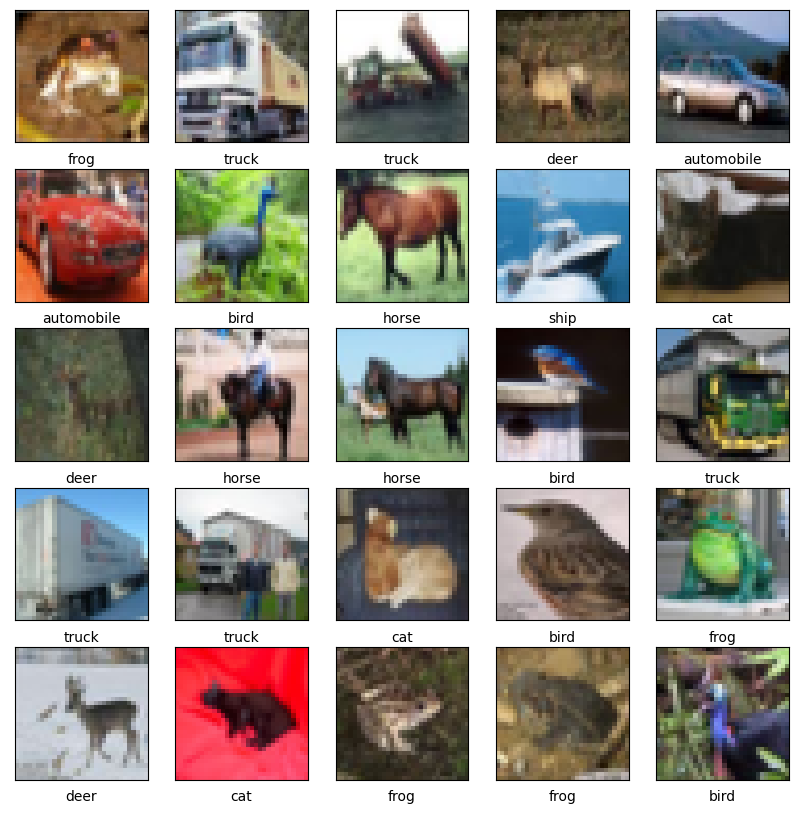

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
inputs = k.Input(shape=(32, 32, 3))
x = k.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', padding='same')(inputs) #C1
x = k.layers.MaxPooling2D()(x) 
x = k.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid')(x) #C3
x = k.layers.MaxPooling2D()(x) 
x = k.layers.Conv2D(120, kernel_size=5, strides=1, activation='tanh', padding='valid')(x) #C5
x = k.layers.Flatten()(x) #Flatten    
x = k.layers.Dense(84, activation='tanh')(x) #F6
outputs = k.layers.Dense(10, activation='softmax')(x) #Output layer

model = k.Model(inputs, outputs)

2023-07-18 14:55:58.244321: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 480)               0     

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_split=0.1, shuffle=False)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2023-07-18 14:55:58.906299: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 110592000 exceeds 10% of free system memory.
2023-07-18 14:55:59.294292: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:164] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
71/71 [==============================] - 3s 39ms/step - loss: 1.9575 - accuracy: 0.3012 - val_loss: 1.7371 - val_accuracy: 0.3800
Epoch 2/10
71/71 [==============================] - 2s 30ms/step - loss: 1.6532 - accuracy: 0.4116 - val_loss: 1.6042 - val_accuracy: 0.4400
Epoch 3/10
71/71 [==============================] - 2s 30ms/step - loss: 1.5459 - accuracy: 0.4484 - val_loss: 1.5571 - val_accuracy: 0.4450
Epoch 4/10
71/71 [==============================] - 2s 33ms/step - loss: 1.4690 - accuracy: 0.4732 - val_loss: 1.4966 - val_accuracy: 0.4650
Epoch 5/10
71/71 [==============================] - 2s 28ms/step - loss: 1.4079 - accuracy: 0.4999 - val_loss: 1.4774 - val_accuracy: 0.4700
Epoch 6/10
71/71 [==============================] - 2s 25ms/step - loss: 1.3655 - accuracy: 0.5142 - val_loss: 1.4394 - val_accuracy: 0.4850
Epoch 7/10
71/71 [==============================] - 2s 25ms/step - loss: 1.3038 - accuracy: 0.5402 - val_loss: 1.4103 - val_accuracy: 0.4960
Epoch 8/10
71

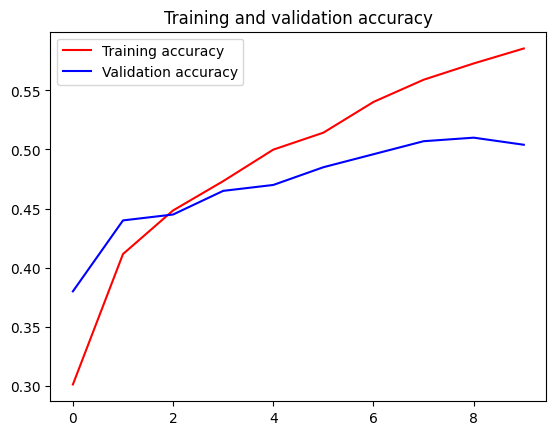

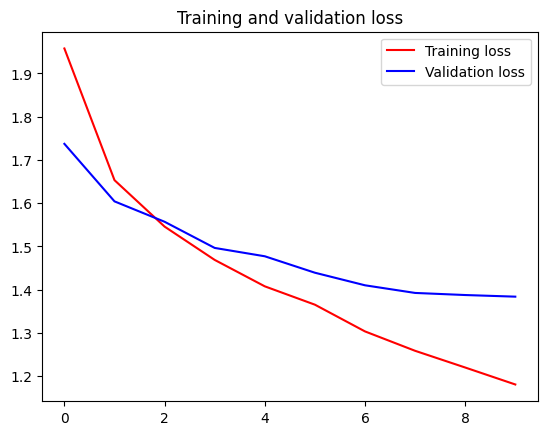

In [9]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

32/32 [==============================] - 0s 6ms/step - loss: 1.4287 - accuracy: 0.4840


: 